In [412]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [413]:
!ls "/content/gdrive/My Drive/Omdena Pandemic/dataset"

 bank-lending-rate-forecast.csv         ilostat_1.csv
 consumer_price_index.csv	        ilostat_2020_min_wages.csv
'COVID19EconomicImpact 10Mar2020.csv'   ilostat_2.csv
 CPI_monthly.csv		        ilostat_sex_rural.csv
 discouraged_job_seekers_monthly.csv    ilostat_tatest_area.csv
 excahnge_rates.csv		        minimum_wages_te.csv
 exchange.csv			       'minimum_wages_trading economics.gsheet'
 iHDI_cleaned.csv		        OXFORD_policies_updated.csv


In [0]:
discouraged_job_drive = "/content/gdrive/My Drive/Omdena Pandemic/dataset/discouraged_job_seekers_monthly.csv"
policies_drive = "/content/gdrive/My Drive/Omdena Pandemic/dataset/OXFORD_policies_updated.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
data = pd.read_csv(discouraged_job_drive)

In [417]:
data.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Canada,Discouraged job-seekers by sex and age (thousa...,CAN - LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): Total,2018M01,28.483,NaN,NaN,Frequency: Monthly,Repository: ILO-STATISTICS - Micro data proces...
1,Canada,Discouraged job-seekers by sex and age (thousa...,CAN - LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): 15-24,2018M01,4.350,NaN,NaN,Frequency: Monthly,Repository: ILO-STATISTICS - Micro data proces...
2,Canada,Discouraged job-seekers by sex and age (thousa...,CAN - LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): 25-54,2018M01,13.871,NaN,NaN,Frequency: Monthly,Repository: ILO-STATISTICS - Micro data proces...
3,Canada,Discouraged job-seekers by sex and age (thousa...,CAN - LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): 55-64,2018M01,10.262,NaN,NaN,Frequency: Monthly,Repository: ILO-STATISTICS - Micro data proces...
4,Canada,Discouraged job-seekers by sex and age (thousa...,CAN - LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): 65+,2018M01,0.000,NaN,NaN,Frequency: Monthly,Repository: ILO-STATISTICS - Micro data proces...


In [418]:
data.shape

(3894, 11)

In [419]:
data.dtypes

ref_area.label           object
indicator.label          object
source.label             object
sex.label                object
classif1.label           object
time                     object
obs_value               float64
obs_status.label         object
note_classif.label       object
note_indicator.label     object
note_source.label        object
dtype: object

In [420]:
data.isnull().sum()

ref_area.label             0
indicator.label            0
source.label               0
sex.label                  0
classif1.label             0
time                       0
obs_value                240
obs_status.label        3216
note_classif.label      3660
note_indicator.label       0
note_source.label          0
dtype: int64

In [0]:
data = data.drop(['indicator.label','source.label','classif1.label','note_indicator.label','note_source.label','note_classif.label','obs_status.label'],axis=1)

In [422]:
data.head()

,ref_area.label,sex.label,time,obs_value
0,Canada,Sex: Total,2018M01,28.483
1,Canada,Sex: Total,2018M01,4.350
2,Canada,Sex: Total,2018M01,13.871
3,Canada,Sex: Total,2018M01,10.262
4,Canada,Sex: Total,2018M01,0.000


In [0]:
#data['sex.label'].str.split(':',expand=True)
data[['label','sex']] = data['sex.label'].str.split(': ',expand=True)

In [424]:
data.head()

,ref_area.label,sex.label,time,obs_value,label,sex
0,Canada,Sex: Total,2018M01,28.483,Sex,Total
1,Canada,Sex: Total,2018M01,4.350,Sex,Total
2,Canada,Sex: Total,2018M01,13.871,Sex,Total
3,Canada,Sex: Total,2018M01,10.262,Sex,Total
4,Canada,Sex: Total,2018M01,0.000,Sex,Total


In [0]:
data = data.drop(['sex.label','label'],axis=1)

In [426]:
data.head()

,ref_area.label,time,obs_value,sex
0,Canada,2018M01,28.483,Total
1,Canada,2018M01,4.350,Total
2,Canada,2018M01,13.871,Total
3,Canada,2018M01,10.262,Total
4,Canada,2018M01,0.000,Total


In [0]:
data = data.rename(columns={'ref_area.label':'Country','obs_value':'djs_value'})

In [428]:
data.head()

,Country,time,djs_value,sex
0,Canada,2018M01,28.483,Total
1,Canada,2018M01,4.350,Total
2,Canada,2018M01,13.871,Total
3,Canada,2018M01,10.262,Total
4,Canada,2018M01,0.000,Total


In [429]:
data['Country'].value_counts() #will be using only using United States Country

United States         702
Chile                 675
Korea, Republic of    648
Canada                639
Peru                  621
Uruguay               309
Russian Federation    300
Name: Country, dtype: int64

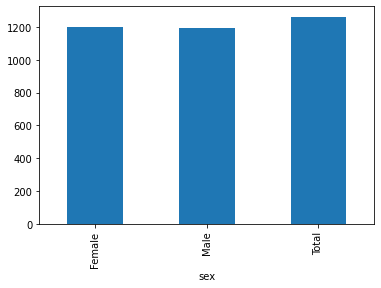

In [430]:
data.groupby(['sex'])['djs_value'].count().plot(kind='bar')

In [0]:
data[['year','month']] = data['time'].str.split('M', expand= True)

In [432]:
data.head()

,Country,time,djs_value,sex,year,month
0,Canada,2018M01,28.483,Total,2018,01
1,Canada,2018M01,4.350,Total,2018,01
2,Canada,2018M01,13.871,Total,2018,01
3,Canada,2018M01,10.262,Total,2018,01
4,Canada,2018M01,0.000,Total,2018,01


In [0]:
data = data.drop(['time'],axis=1)

In [434]:
data.head()

,Country,djs_value,sex,year,month
0,Canada,28.483,Total,2018,01
1,Canada,4.350,Total,2018,01
2,Canada,13.871,Total,2018,01
3,Canada,10.262,Total,2018,01
4,Canada,0.000,Total,2018,01


In [435]:
data.groupby(['year','Country'])['sex'].count()

year  Country           
2018  Canada                303
      Chile                 324
      Korea, Republic of    324
      Peru                  324
      Russian Federation    300
      United States         324
      Uruguay               309
2019  Canada                288
      Chile                 324
      Korea, Republic of    324
      Peru                  297
      United States         324
2020  Canada                 48
      Chile                  27
      United States          54
Name: sex, dtype: int64

In [0]:
#slice the details for the country = untied stated, the years 2019 and 2020, sex == male and female
djs_data = data[data['Country'] == 'United States']

In [437]:
djs_data.head()

,Country,djs_value,sex,year,month
3192,United States,1536.9336,Total,2018,01
3193,United States,483.9496,Total,2018,01
3194,United States,674.4048,Total,2018,01
3195,United States,184.4297,Total,2018,01
3196,United States,194.1495,Total,2018,01


In [438]:
djs_data.dtypes

Country       object
djs_value    float64
sex           object
year          object
month         object
dtype: object

In [439]:
djs_data['month'] = djs_data['month'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [440]:
djs_data['year'] = djs_data['year'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [441]:
djs_data.shape

(702, 5)

In [442]:
djs_data['djs_value'] = djs_data['djs_value'].apply(np.floor)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
djs_total_data = djs_data[djs_data['sex'] == 'Total'] #all the total sex details

In [444]:
djs_total_data.head()

,Country,djs_value,sex,year,month
3192,United States,1536.0,Total,2018,1
3193,United States,483.0,Total,2018,1
3194,United States,674.0,Total,2018,1
3195,United States,184.0,Total,2018,1
3196,United States,194.0,Total,2018,1


In [0]:
djs_data = djs_data[djs_data['sex'] != 'Total']

In [446]:
djs_data.head(10)

,Country,djs_value,sex,year,month
3197,United States,847.0,Male,2018,1
3198,United States,303.0,Male,2018,1
3199,United States,323.0,Male,2018,1
3200,United States,121.0,Male,2018,1
3201,United States,98.0,Male,2018,1
3202,United States,689.0,Female,2018,1
3203,United States,180.0,Female,2018,1
3204,United States,351.0,Female,2018,1
3205,United States,62.0,Female,2018,1
3206,United States,95.0,Female,2018,1


In [447]:
djs_data.dtypes

Country       object
djs_value    float64
sex           object
year           int64
month          int64
dtype: object

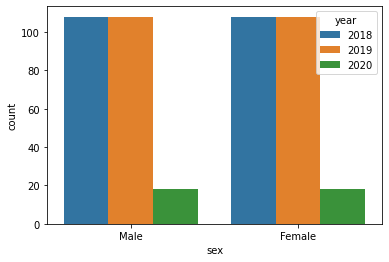

In [448]:
sns.countplot(x='sex',hue='year',data=djs_data)

In [449]:
djs_total_data.head(15)

,Country,djs_value,sex,year,month
3192,United States,1536.0,Total,2018,1
3193,United States,483.0,Total,2018,1
3194,United States,674.0,Total,2018,1
3195,United States,184.0,Total,2018,1
3196,United States,194.0,Total,2018,1
3207,United States,1536.0,Total,2018,1
3208,United States,1342.0,Total,2018,1
3209,United States,483.0,Total,2018,1
3210,United States,1052.0,Total,2018,1
3219,United States,1499.0,Total,2018,2


In [0]:
djs_total_data = djs_total_data[djs_total_data['year'] != 2018]  #lookinf only for year 2019 and 2020

In [451]:
djs_total_data.head(10)

,Country,djs_value,sex,year,month
3516,United States,1473.0,Total,2019,1
3517,United States,405.0,Total,2019,1
3518,United States,753.0,Total,2019,1
3519,United States,199.0,Total,2019,1
3520,United States,115.0,Total,2019,1
3531,United States,1473.0,Total,2019,1
3532,United States,1358.0,Total,2019,1
3533,United States,405.0,Total,2019,1
3534,United States,1067.0,Total,2019,1
3543,United States,1330.0,Total,2019,2


In [452]:
djs_total_data.groupby(['year','month']).mean()

djs_value
year month            
2019 1      805.333333
     2      727.777778
     3      684.000000
     4      718.333333
     5      703.444444
     6      762.222222
     7      753.555556
     8      786.777778
     9      643.777778
     10     614.333333
     11     630.777778
     12     626.000000
2020 1      730.000000
     2      758.666667

In [0]:
#going to get the mean value for the particular month
mean = djs_total_data.groupby(['year','month']).mean()

In [454]:
mean

djs_value
year month            
2019 1      805.333333
     2      727.777778
     3      684.000000
     4      718.333333
     5      703.444444
     6      762.222222
     7      753.555556
     8      786.777778
     9      643.777778
     10     614.333333
     11     630.777778
     12     626.000000
2020 1      730.000000
     2      758.666667

In [0]:
df= pd.DataFrame( { 
    "Year" : [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020] , 
    "Month" : [1, 2,3,4,5,6,7,8,9,10,11,12,1,2] ,
    "djs_value":[805.333333,727.777778,684.000000,718.333333,703.444444,762.222222,753.555556,786.777778,643.777778,614.333333,630.777778,626.000000,730.000000,758.666667]})

In [456]:
df.head() #this contains the discouraged job seekers per month for years 2019 and 2020 for the country United States

,Year,Month,djs_value
0,2019,1,805.333333
1,2019,2,727.777778
2,2019,3,684.000000
3,2019,4,718.333333
4,2019,5,703.444444


In [0]:
df['djs_value'] = df['djs_value'].apply(np.floor)


In [458]:
df.head()

,Year,Month,djs_value
0,2019,1,805.0
1,2019,2,727.0
2,2019,3,684.0
3,2019,4,718.0
4,2019,5,703.0


In [459]:
df.isnull().sum()

Year         0
Month        0
djs_value    0
dtype: int64

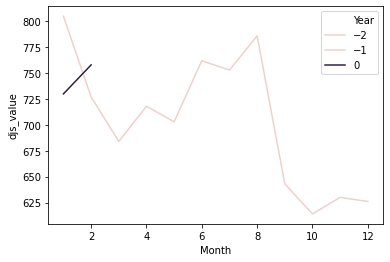

In [460]:
 sns.lineplot(x="Month", y="djs_value", hue="Year", data=df)

In [0]:
data_1 = pd.read_csv(policies_drive)

In [462]:
data_1.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [463]:
data_1.dtypes

CountryName                               object
CountryCode                               object
Date                                       int64
C1_School closing                        float64
C1_Flag                                  float64
C2_Workplace closing                     float64
C2_Flag                                  float64
C3_Cancel public events                  float64
C3_Flag                                  float64
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C5_Close public transport                float64
C5_Flag                                  float64
C6_Stay at home requirements             float64
C6_Flag                                  float64
C7_Restrictions on internal movement     float64
C7_Flag                                  float64
C8_International travel controls         float64
E1_Income support                        float64
E1_Flag                                  float64
E2_Debt/contract rel

In [464]:
#filling the na with 0
data_1.isnull().sum()

CountryName                                  0
CountryCode                                  0
Date                                         0
C1_School closing                          560
C1_Flag                                  12839
C2_Workplace closing                       697
C2_Flag                                  14372
C3_Cancel public events                    697
C3_Flag                                  12761
C4_Restrictions on gatherings              727
C4_Flag                                  14187
C5_Close public transport                  747
C5_Flag                                  16413
C6_Stay at home requirements               701
C6_Flag                                  15230
C7_Restrictions on internal movement       737
C7_Flag                                  14759
C8_International travel controls           727
E1_Income support                          844
E1_Flag                                  18274
E2_Debt/contract relief                    863
E3_Fiscal mea

In [0]:
data_1 = data_1.fillna(0)

In [466]:
data_1.isnull().sum()

CountryName                              0
CountryCode                              0
Date                                     0
C1_School closing                        0
C1_Flag                                  0
C2_Workplace closing                     0
C2_Flag                                  0
C3_Cancel public events                  0
C3_Flag                                  0
C4_Restrictions on gatherings            0
C4_Flag                                  0
C5_Close public transport                0
C5_Flag                                  0
C6_Stay at home requirements             0
C6_Flag                                  0
C7_Restrictions on internal movement     0
C7_Flag                                  0
C8_International travel controls         0
E1_Income support                        0
E1_Flag                                  0
E2_Debt/contract relief                  0
E3_Fiscal measures                       0
E4_International support                 0
H1_Public i

In [467]:
data_1['CountryName'].value_counts()

Portugal               140
Azerbaijan             140
Trinidad and Tobago    140
Puerto Rico            140
South Korea            140
                      ... 
Barbados               138
Cote d'Ivoire          138
Kosovo                 138
Italy                  138
Solomon Islands        136
Name: CountryName, Length: 167, dtype: int64

In [0]:
data_us = data_1[data_1['CountryName'] == "United States"]

In [469]:
data_us.head(10)

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
21777,United States,USA,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21778,United States,USA,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21779,United States,USA,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21780,United States,USA,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21781,United States,USA,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21782,United States,USA,20200106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21783,United States,USA,20200107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21784,United States,USA,20200108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21785,United States,USA,20200109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21786,United States,USA,20200110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_us = data_us.rename(columns={'CountryName':'Country'})

In [0]:
data_us = data_us.reset_index()

In [472]:
data_us.head(10)

,index,Country,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,21777,United States,USA,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21778,United States,USA,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21779,United States,USA,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21780,United States,USA,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21781,United States,USA,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,21782,United States,USA,20200106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,21783,United States,USA,20200107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21784,United States,USA,20200108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,21785,United States,USA,20200109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21786,United States,USA,20200110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_us['Date'] = data_us['Date'].astype(str)

In [0]:
data_us['Date'] = pd.to_datetime(data_us['Date'], format='%Y%m%d')

In [475]:
data_us.head()

,index,Country,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,21777,United States,USA,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21778,United States,USA,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21779,United States,USA,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21780,United States,USA,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21781,United States,USA,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_us['Year'] = data_us['Date'].dt.year
#data['month'] = pd.DatetimeIndex(df['ArrivalDate']).month
#data_us['Date'].dt.year

In [0]:
data_us['Month'] = data_us['Date'].dt.month

In [478]:
data_us.dtypes

index                                             int64
Country                                          object
CountryCode                                      object
Date                                     datetime64[ns]
C1_School closing                               float64
C1_Flag                                         float64
C2_Workplace closing                            float64
C2_Flag                                         float64
C3_Cancel public events                         float64
C3_Flag                                         float64
C4_Restrictions on gatherings                   float64
C4_Flag                                         float64
C5_Close public transport                       float64
C5_Flag                                         float64
C6_Stay at home requirements                    float64
C6_Flag                                         float64
C7_Restrictions on internal movement            float64
C7_Flag                                         

In [0]:
data_us = data_us.drop(['CountryCode'],axis=1)

In [480]:
data_us.head(10)

,index,Country,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
0,21777,United States,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
1,21778,United States,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
2,21779,United States,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
3,21780,United States,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
4,21781,United States,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
5,21782,United States,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
6,21783,United States,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
7,21784,United States,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
8,21785,United States,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
9,21786,United States,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1


In [489]:
data_us[data_us['C3_Cancel public events'] >0.0]

,index,Country,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
60,21837,United States,2020-03-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,69.0,1.0,9.53,9.53,10.48,10.48,2020,3
61,21838,United States,2020-03-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,89.0,2.0,12.30,12.30,13.33,13.33,2020,3
62,21839,United States,2020-03-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,103.0,6.0,12.30,12.30,13.33,13.33,2020,3
63,21840,United States,2020-03-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,125.0,9.0,12.30,12.30,13.33,13.33,2020,3
64,21841,United States,2020-03-05,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,159.0,11.0,20.24,20.24,24.05,24.05,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,21908,United States,2020-05-11,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,1329799.0,79528.0,68.41,68.41,70.00,70.00,2020,5
132,21909,United States,2020-05-12,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,1347916.0,80684.0,68.41,68.41,70.00,70.00,2020,5
133,21910,United States,2020-05-13,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,1369964.0,82387.0,68.41,68.41,70.00,70.00,2020,5
134,21911,United States,2020-05-14,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,1390746.0,84133.0,68.41,68.41,70.00,70.00,2020,5


In [0]:
data_us_cancel_public = data_us[data_us['C3_Cancel public events'] >0.0]

In [491]:
data_us_cancel_public.head()

,index,Country,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
60,21837,United States,2020-03-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,69.0,1.0,9.53,9.53,10.48,10.48,2020,3
61,21838,United States,2020-03-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,89.0,2.0,12.30,12.30,13.33,13.33,2020,3
62,21839,United States,2020-03-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,103.0,6.0,12.30,12.30,13.33,13.33,2020,3
63,21840,United States,2020-03-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,125.0,9.0,12.30,12.30,13.33,13.33,2020,3
64,21841,United States,2020-03-05,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,159.0,11.0,20.24,20.24,24.05,24.05,2020,3


In [0]:
data_us_cancel_public = data_us_cancel_public.loc[:, ["Country", "C3_Cancel public events","Year","Month"]]

In [493]:
data_us_cancel_public.groupby(['Month','Year']).count()

,,Country,C3_Cancel public events
Month,Year,,
3,2020,31,31
4,2020,30,30
5,2020,15,15


In [481]:
data_us[data_us['C2_Workplace closing'] >0.0]
#for discouraged job seekers the policies that will affect are: C2_Workplace closing, C3_Cancel public events, 	C4_Restrictions on gatherings, C5_Close public transport, C6_Stay at home requirements

,index,Country,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
78,21855,United States,2020-03-19,3.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,9415.0,150.0,64.44,64.44,68.10,68.10,2020,3
79,21856,United States,2020-03-20,3.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,14250.0,150.0,64.44,64.44,68.10,68.10,2020,3
80,21857,United States,2020-03-21,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,19624.0,260.0,68.41,68.41,70.00,70.00,2020,3
81,21858,United States,2020-03-22,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,26747.0,340.0,68.41,68.41,70.00,70.00,2020,3
82,21859,United States,2020-03-23,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,35206.0,471.0,68.41,68.41,70.00,70.00,2020,3
83,21860,United States,2020-03-24,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,46442.0,590.0,68.41,68.41,70.00,70.00,2020,3
84,21861,United States,2020-03-25,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,55231.0,801.0,68.41,68.41,70.00,70.00,2020,3
85,21862,United States,2020-03-26,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,274000000.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,69194.0,1050.0,68.41,68.41,70.00,70.00,2020,3
86,21863,United States,2020-03-27,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,1.957600e+12,0.0,2.0,1.0,3.0,1.0,2.424000e+11,0.0,0.0,85991.0,1296.0,68.41,68.41,70.00,70.00,2020,3
87,21864,United States,2020-03-28,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.000000e+00,0.0,0.0,104686.0,1707.0,68.41,68.41,70.00,70.00,2020,3


In [0]:
#taking on the workplace closing policy
data_us_worplace_closing = data_us[data_us['C2_Workplace closing'] >0.0]


In [483]:
data_us_worplace_closing.head()

,index,Country,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
78,21855,United States,2020-03-19,3.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,9415.0,150.0,64.44,64.44,68.1,68.1,2020,3
79,21856,United States,2020-03-20,3.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,14250.0,150.0,64.44,64.44,68.1,68.1,2020,3
80,21857,United States,2020-03-21,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,19624.0,260.0,68.41,68.41,70.0,70.0,2020,3
81,21858,United States,2020-03-22,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,26747.0,340.0,68.41,68.41,70.0,70.0,2020,3
82,21859,United States,2020-03-23,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,35206.0,471.0,68.41,68.41,70.0,70.0,2020,3


In [484]:
data_us_worplace_closing.isnull().sum()

index                                    0
Country                                  0
Date                                     0
C1_School closing                        0
C1_Flag                                  0
C2_Workplace closing                     0
C2_Flag                                  0
C3_Cancel public events                  0
C3_Flag                                  0
C4_Restrictions on gatherings            0
C4_Flag                                  0
C5_Close public transport                0
C5_Flag                                  0
C6_Stay at home requirements             0
C6_Flag                                  0
C7_Restrictions on internal movement     0
C7_Flag                                  0
C8_International travel controls         0
E1_Income support                        0
E1_Flag                                  0
E2_Debt/contract relief                  0
E3_Fiscal measures                       0
E4_International support                 0
H1_Public i

In [0]:
data_us_worplace_closing = data_us_worplace_closing.loc[:, ["Country", "C2_Workplace closing","Year","Month"]]

In [486]:
data_us_worplace_closing.head()

,Country,C2_Workplace closing,Year,Month
78,United States,3.0,2020,3
79,United States,3.0,2020,3
80,United States,3.0,2020,3
81,United States,3.0,2020,3
82,United States,3.0,2020,3


In [487]:
data_us_worplace_closing.groupby(['Month','Year']).count()

,,Country,C2_Workplace closing
Month,Year,,
3,2020,13,13
4,2020,30,30
5,2020,15,15


In [0]:
#Looks like discouraged job seekers do not have data for monthe 3,4,5 they oly have data for months 1 and 2